# Título

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
# Lectura de datos históricos
df = pd.read_csv("./src/info_prestamos.csv", encoding="ISO-8859-1", delimiter=",")

In [3]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


# 3.Análisis de Datos (EDA) + Preprocesado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

## 3.1 Limpieza inicial

In [5]:
# Ver nulos por columna
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [6]:
# Eliminar variables con alto porcentaje de nulos
df_var = df.isnull().sum()
# Setear porcentaje de eliminacion
porcentaje = 0.2
# Punto de corte
corte = porcentaje * len(df)
# Eliminar columnas con alto porcentaje de nulos
df_var = df_var[df_var<corte]
indices = df_var.index
df = df[indices]
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [7]:
# Ver como ha quedado después de eliminar nulos
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25349
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [8]:
# Mostrar datos estadísticos de columnas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [9]:
df["Length_Employed"].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [10]:
df["Length_Employed"] = df["Length_Employed"].str.replace("< 1 year", "0 years")
df["Length_Employed"] = df["Length_Employed"].str.extract("(\d+)")
df["Length_Employed"] = df["Length_Employed"].apply(pd.to_numeric)
df["Length_Employed"]

0          0.0
1          4.0
2          7.0
3          0.0
4          8.0
          ... 
164304    10.0
164305     8.0
164306    10.0
164307     4.0
164308    10.0
Name: Length_Employed, Length: 164309, dtype: float64

In [11]:
df["Length_Employed"].unique()

array([ 0.,  4.,  7.,  8.,  2., 10.,  1., nan,  6.,  9.,  3.,  5.])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        156938 non-null  float64
 3   Home_Owner             138960 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 16.3+ MB


In [13]:
print("Correlación con Length_Employed")
df.corr()["Length_Employed"].sort_values()

Correlación con Length_Employed


Inquiries_Last_6Mo     -0.006522
Loan_ID                 0.000152
Interest_Rate           0.030404
Number_Open_Accounts    0.037321
Debt_To_Income          0.049020
Annual_Income           0.069505
Total_Accounts          0.111460
Length_Employed         1.000000
Name: Length_Employed, dtype: float64

In [14]:
print("Promedio de Length_Employed por Total_Accounts")
df.groupby("Total_Accounts").mean()["Length_Employed"]

Promedio de Length_Employed por Total_Accounts


Total_Accounts
2       2.500000
3       2.709924
4       3.662551
5       4.180240
6       4.260575
         ...    
99     10.000000
102     7.000000
105    10.000000
116    10.000000
156    10.000000
Name: Length_Employed, Length: 100, dtype: float64

In [15]:
total_acc_avg = df.groupby("Total_Accounts").mean()["Length_Employed"]

In [16]:
total_acc_avg[5]

4.180240320427236

In [17]:
def completa_len_empl(total_acc, len_map):
    if np.isnan(len_map):
        # Si el valor es nulo, se devuelve el promedio calculado
        return total_acc_avg[total_acc]
    else:
        return len_map

In [18]:
# Limpiar los datos de Length_Employed
df['Length_Employed'] = df.apply(lambda x: completa_len_empl(x["Total_Accounts"], x["Length_Employed"]), axis=1)

In [19]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner               25349
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [20]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [21]:
df["Home_Owner"].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [22]:
df.groupby("Home_Owner").mean()

,Loan_ID,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
Home_Owner,,,,,,,,
Mortgage,1.008211e+07,6.673973,83699.371184,17.144232,0.840387,11.860672,27.669188,2.112673
None,1.007899e+07,4.384603,70550.000000,15.749000,0.400000,9.800000,20.000000,1.900000
Other,1.007884e+07,4.818072,64540.743590,14.535306,0.938776,9.306122,23.530612,2.081633
Own,1.008211e+07,6.189912,66104.826361,17.824458,0.768782,10.967186,24.343792,2.170299
Rent,1.008234e+07,5.081681,62077.534637,17.124675,0.708322,10.425158,22.021060,2.213382


<AxesSubplot:xlabel='Home_Owner'>

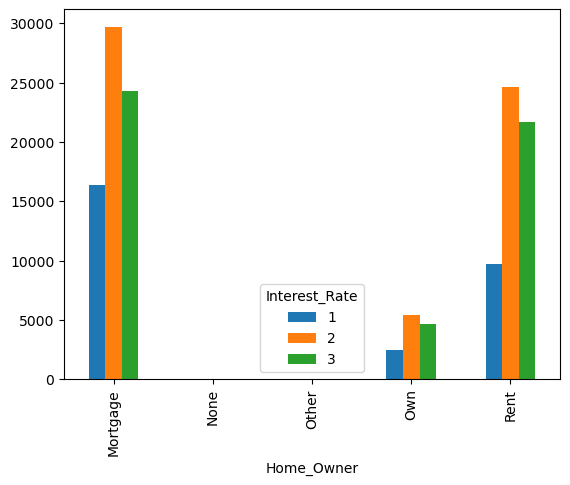

In [23]:
# Calcular la distribución de los valores de Interest_Rate vs los valores de Home_Owner
df.pivot_table(
    index="Home_Owner",
    columns="Interest_Rate",
    values="Loan_ID",
    aggfunc="count",
).plot(kind="bar")

In [24]:
def completar_home_owner(home_owner,int_rate):
    if home_owner=='':
        if int_rate == 3:
            return "Rent"
        else:
            return "Mortgage" #En caso de que Interest_Rate = 1 / 2
    else:
        return home_owner

In [25]:
df["Home_Owner"] = df["Home_Owner"].replace(np.nan, '')

In [26]:
df["Home_Owner"] = df.apply(lambda x: completar_home_owner(x["Home_Owner"], x["Interest_Rate"]), axis=1)

In [27]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


(array([1.17229e+05, 1.97800e+04, 1.62000e+03, 3.19000e+02, 1.29000e+02,
        4.80000e+01, 1.90000e+01, 2.20000e+01, 1.50000e+01, 8.00000e+00]),
 array([  4000. , 103599.9, 203199.8, 302799.7, 402399.6, 501999.5,
        601599.4, 701199.3, 800799.2, 900399.1, 999999. ]),
 <BarContainer object of 10 artists>)

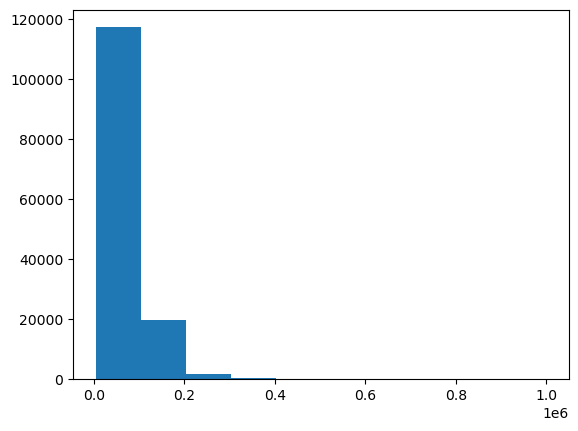

In [28]:
df_aux = df[ df["Annual_Income"]<1000000 ]
plt.hist( df_aux["Annual_Income"], bins=10 )

In [29]:
# Ver correlación de Annual_Income con otras columnas
df.corr()["Annual_Income"].sort_values()

Debt_To_Income         -0.173589
Interest_Rate          -0.052783
Loan_ID                 0.008326
Inquiries_Last_6Mo      0.060011
Length_Employed         0.070139
Number_Open_Accounts    0.145822
Total_Accounts          0.203237
Annual_Income           1.000000
Name: Annual_Income, dtype: float64

In [30]:
total_acc_inc_avg = df.groupby("Total_Accounts").mean()["Annual_Income"]
total_acc_inc_avg

Total_Accounts
2       88617.400000
3       36087.616140
4       44522.606276
5       45691.847537
6       47686.809039
           ...      
99      97000.000000
102              NaN
105     38000.000000
116    240000.000000
156     42000.000000
Name: Annual_Income, Length: 100, dtype: float64

In [31]:
def completar_an_inc(total_acc,an_inc):
    if np.isnan(an_inc):
        return total_acc_inc_avg[total_acc] #Si el valor es nulo devuelve el promedio de Length_Employed para el valor correspondiente de Total_Accounts
    else:
        return an_inc

# Limpiar Total_Accounts
df["Annual_Income"] = df.apply(lambda x: completar_an_inc(x["Total_Accounts"], x["Annual_Income"]), axis=1)


In [32]:
df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            1
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [33]:
df[ df["Annual_Income"].isnull() ]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
86968,10086969,"24,000",7.0,Mortgage,NaN,VERIFIED - income,home_improvement,19.51,0,10,102,Male,3


In [34]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  object 
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 17.5+ MB


In [35]:
# Transformar Loan_Amount_Requested
df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].str.replace(",", "").apply(pd.to_numeric)

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164308.0,1.008215e+07,47432.209880,10000001.0,10041077.75,10082154.50,1.012323e+07,10164309.00
Loan_Amount_Requested,164308.0,1.434928e+04,8281.859681,500.0,8000.00,12075.00,2.000000e+04,35000.00
Length_Employed,164308.0,5.990712e+00,3.548372,0.0,3.00,6.00,1.000000e+01,10.00
Annual_Income,164308.0,7.332921e+04,55796.901118,4000.0,48000.00,65000.00,8.560164e+04,7500000.00
Debt_To_Income,164308.0,1.720718e+01,7.845104,0.0,11.37,16.84,2.278000e+01,39.99
Inquiries_Last_6Mo,164308.0,7.817027e-01,1.034748,0.0,0.00,0.00,1.000000e+00,8.00
Number_Open_Accounts,164308.0,1.119383e+01,4.991828,0.0,8.00,10.00,1.400000e+01,76.00
Total_Accounts,164308.0,2.506720e+01,11.581547,2.0,17.00,23.00,3.200000e+01,156.00
Interest_Rate,164308.0,2.158945e+00,0.738363,1.0,2.00,2.00,3.000000e+00,3.00


## 3.2 Visualización

### 3.2.1 Plots básicos

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

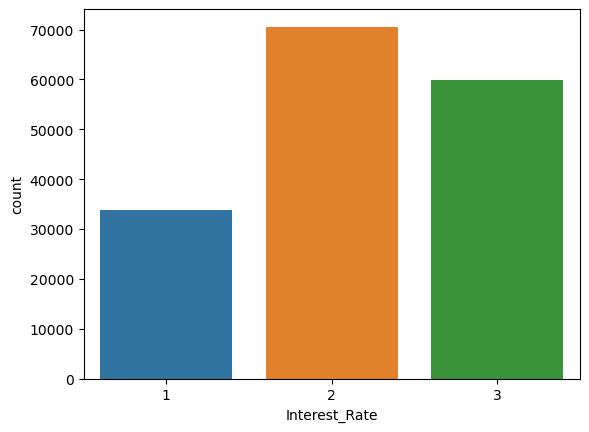

In [37]:
# Ver si hay una proporción equilibrada entre los diferentes valores
# de la variable objetivo "Interest_Rate"
sns.countplot( x="Interest_Rate", data=df )

(10.0, 0.0)

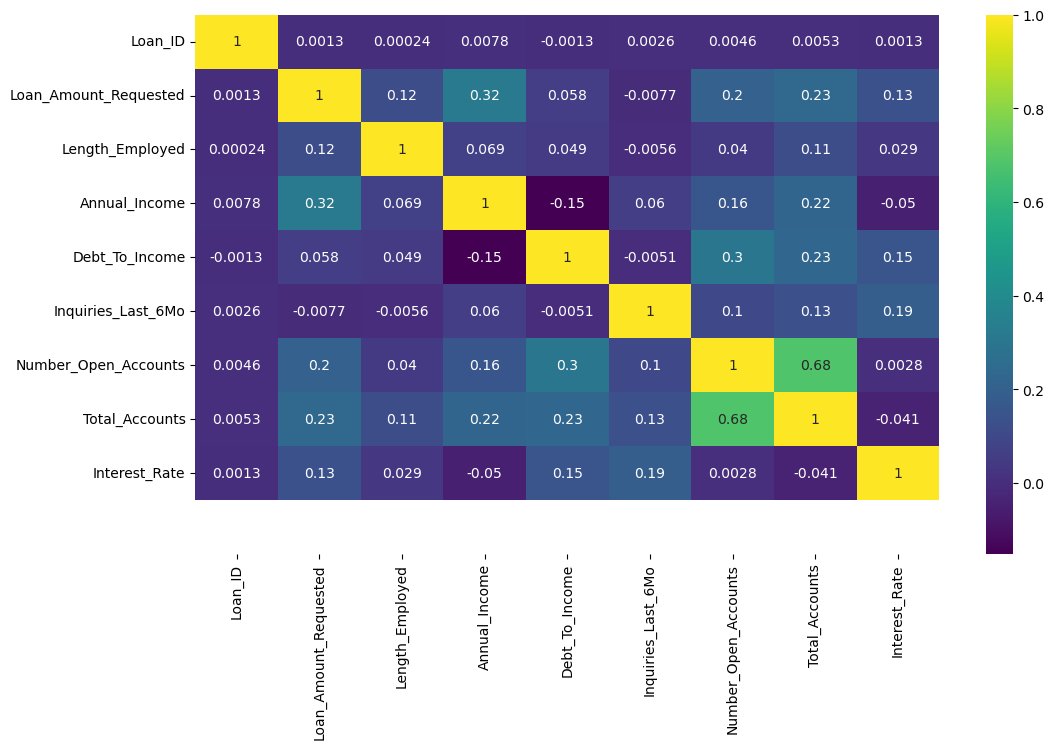

In [38]:
plt.figure( figsize=(12,7) )
sns.heatmap( df.corr(), annot=True, cmap="viridis" )
plt.ylim(10, 0)

In [39]:
df.corr()["Interest_Rate"].sort_values()

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.132479
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

<AxesSubplot:>

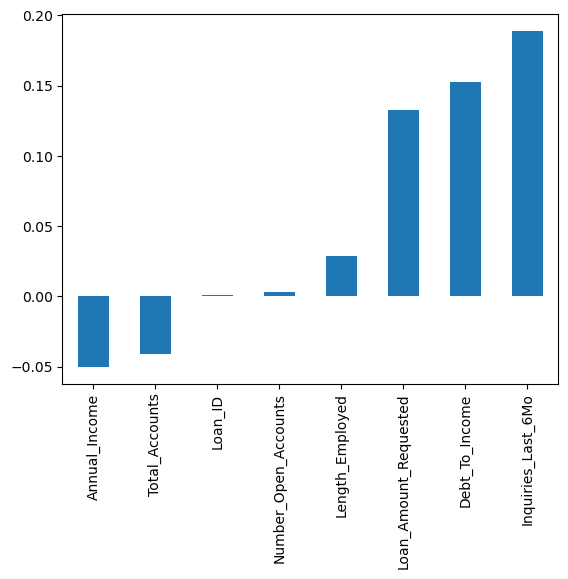

In [40]:
# Quitar la propia variable objetivo para que el gráfico no se distorcione
df.corr()['Interest_Rate'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Interest_Rate', ylabel='Inquiries_Last_6Mo'>

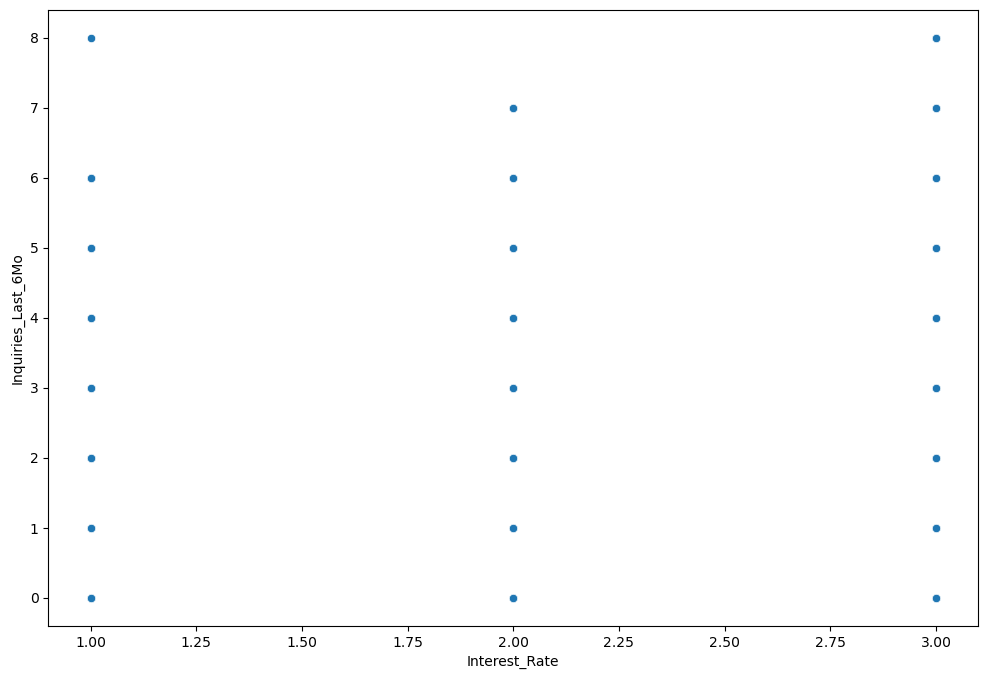

In [41]:
# Visualizar variables altamente correlacionadas con la salida
plt.figure( figsize=(12, 8) )
sns.scatterplot( x="Interest_Rate", y="Inquiries_Last_6Mo", data=df )

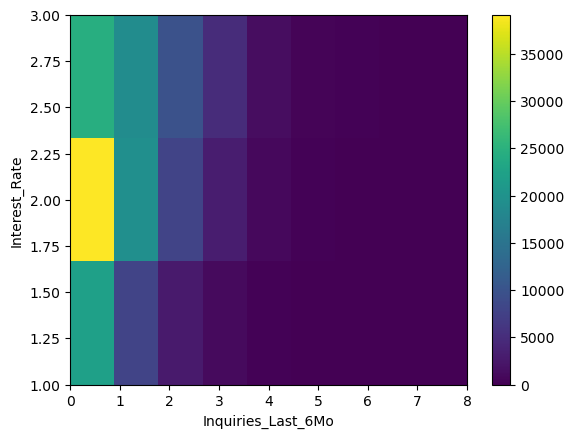

In [42]:
# Si los valores están normalizados, lo mejor es hacer visualizar un histograma 2D
plt.hist2d( df["Inquiries_Last_6Mo"], df["Interest_Rate"], bins=(9,3), cmap=plt.cm.viridis )
plt.xlabel( "Inquiries_Last_6Mo" )
plt.ylabel( "Interest_Rate" )
plt.colorbar()

### 3.2.2 Plot geográficos

### 3.2.3 Otras variables

<AxesSubplot:xlabel='Gender'>

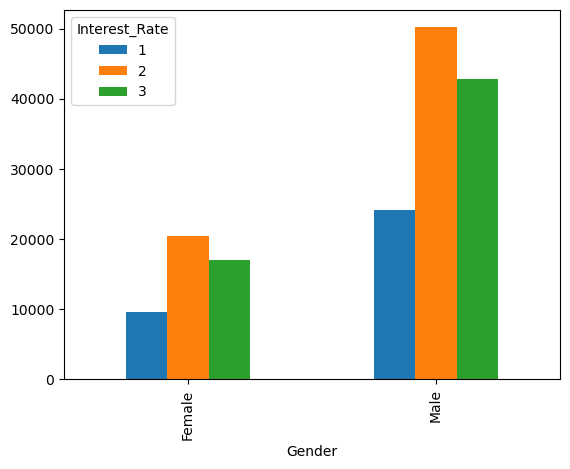

In [43]:
# ¿Existe alguna diferencia entre el comportamiento de un hombre y una mujer?
df.pivot_table( index="Gender", columns="Interest_Rate", values="Loan_ID", aggfunc="count" ).plot(kind="bar")

<AxesSubplot:xlabel='Purpose_Of_Loan'>

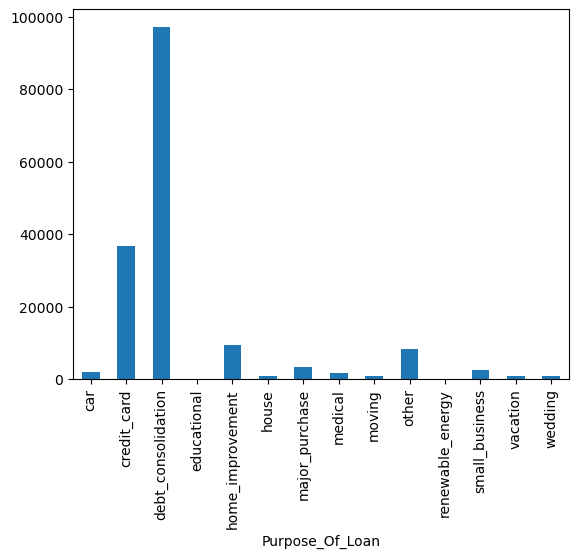

In [44]:
# ¿Están enfocados los préstamos en alguna categoría concreta del objetivo del préstamo?
df.groupby("Purpose_Of_Loan").agg("count")["Interest_Rate"].plot(kind="bar")

## 3.3 Limpieza final

In [45]:
df.corr()["Interest_Rate"].sort_values()

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.132479
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [46]:
df = df.drop(['Number_Open_Accounts','Loan_ID','Income_Verified'], axis=1)
df.head(5)

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,Rent,68000.00000,car,18.37,0,14,Female,1
1,30000,4.0,Mortgage,73993.44661,debt_consolidation,14.93,0,24,Female,3
2,24725,7.0,Mortgage,75566.40000,debt_consolidation,15.88,0,16,Male,3
3,16000,0.0,Rent,56160.00000,debt_consolidation,14.34,3,22,Male,3
4,17000,8.0,Own,96000.00000,debt_consolidation,22.17,1,30,Female,1


### 3.3.2 Limpieza temporal

### 3.3.3 Transformación variables categóricas

In [47]:
# Analizar si tiene pocos valores para ver si le agreganos columnas dummy
df["Home_Owner"].value_counts()

Mortgage    86375
Rent        65349
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [48]:
df["Purpose_Of_Loan"].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9268
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [49]:
df["Gender"].value_counts()

Male      117175
Female     47133
Name: Gender, dtype: int64

In [50]:
# Tansformar "Home_Owner"
dummies = pd.get_dummies( df[['Home_Owner', 'Purpose_Of_Loan', 'Gender']] )
df_post = pd.concat( [df, dummies], axis=1 )
# Eliminamos las columnas originales
df_post = df_post.drop(['Home_Owner', 'Purpose_Of_Loan', 'Gender'], axis=1)

In [51]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Loan_Amount_Requested               164308 non-null  int64  
 1   Length_Employed                     164308 non-null  float64
 2   Annual_Income                       164308 non-null  float64
 3   Debt_To_Income                      164308 non-null  float64
 4   Inquiries_Last_6Mo                  164308 non-null  int64  
 5   Total_Accounts                      164308 non-null  int64  
 6   Interest_Rate                       164308 non-null  int64  
 7   Home_Owner_Mortgage                 164308 non-null  uint8  
 8   Home_Owner_None                     164308 non-null  uint8  
 9   Home_Owner_Other                    164308 non-null  uint8  
 10  Home_Owner_Own                      164308 non-null  uint8  
 11  Home_Owner_Rent           

# 4.Train Test Split

In [52]:
x = df_post.drop("Interest_Rate", axis=1).values
y = df_post["Interest_Rate"]

In [53]:
y = pd.get_dummies(y)

In [54]:
y = y.values
print(x)
print(y)

[[7.00000000e+03 0.00000000e+00 6.80000000e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.00000000e+04 4.00000000e+00 7.39934466e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.47250000e+04 7.00000000e+00 7.55664000e+04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.02500000e+04 1.00000000e+01 8.05713091e+04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+04 4.00000000e+00 9.90043853e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.25000000e+03 1.00000000e+01 5.24778918e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=101 )

In [57]:
x_train.shape

(123231, 27)

In [58]:
x_test.shape

(41077, 27)

# 5.Escalado

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Ya que las columnas numéricas tienen comas esto devolverá el siguiente error
# ValueError: could not convert string to float

# Por lo tanto creamos este método para convertir los elementos de
# un numpy.ndarray desde string hacia float
# def strNPArrayToFloatNPArray(strArray):
#     x_train_pd = pd.DataFrame(data=strArray)
#     x_replace = x_train_pd.replace(",", "", regex=True)
#     x_array = x_replace.values
#     return x_array.astype(float)

# x_train = strNPArrayToFloatNPArray(x_train)
# x_test = strNPArrayToFloatNPArray(x_test)
scaler.fit(x_train)

MinMaxScaler()

In [62]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
x_train.shape

(123231, 27)

In [64]:
x_test.shape

(41077, 27)

In [65]:
x_train

array([[0.27536232, 0.3       , 0.00853789, ..., 0.        , 0.        ,
        1.        ],
       [0.44927536, 0.9       , 0.00693703, ..., 0.        , 0.        ,
        1.        ],
       [0.55072464, 0.1       , 0.00747065, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.01463047, ..., 0.        , 0.        ,
        1.        ],
       [0.28985507, 0.8       , 0.00996868, ..., 0.        , 0.        ,
        1.        ],
       [0.09275362, 0.63988426, 0.00322839, ..., 0.        , 0.        ,
        1.        ]])

In [66]:
x_train.max()

1.0

# 6.Creación del modelo

    # Para un problema de clasificación multiclase
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
                  
    

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

2023-03-12 13:38:33.432897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 13:38:33.749054: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 13:38:33.749096: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 13:38:34.889260: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [68]:
x_train.shape

(123231, 27)

In [69]:
model = Sequential()
# Elegir número de neuronas
neuronas = x_train.shape[1]
neuronas_salida = len(df["Interest_Rate"].unique())

# Agregar capas
model.add( Dense( units=neuronas, activation='relu' ) )
model.add( Dense( units=np.round(neuronas/2), activation='relu' ) )
model.add( Dense( units=neuronas_salida, activation='softmax' ) ) # softmax relaciona las categorías entre si

# Para una clasificación multiclase usamos "categorical_crossentropy"
model.compile( loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"] )

2023-03-12 13:38:36.377710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 13:38:36.377956: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 13:38:36.378038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-12 13:38:36.378090: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-12 13:38:36.378137: W tensorflow/c

# 7. Entrenamiento del modelo

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping( monitor="val_loss", mode="min", verbose=1, patience=15 )

In [71]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=200,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/200
482/482 [==============================] - 1s 2ms/step - loss: 1.0012 - categorical_accuracy: 0.4888 - val_loss: 0.9626 - val_categorical_accuracy: 0.5187
Epoch 2/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9614 - categorical_accuracy: 0.5189 - val_loss: 0.9587 - val_categorical_accuracy: 0.5237
Epoch 3/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9593 - categorical_accuracy: 0.5202 - val_loss: 0.9589 - val_categorical_accuracy: 0.5224
Epoch 4/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9580 - categorical_accuracy: 0.5200 - val_loss: 0.9577 - val_categorical_accuracy: 0.5227
Epoch 5/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9572 - categorical_accuracy: 0.5205 - val_loss: 0.9530 - val_categorical_accuracy: 0.5261
Epoch 6/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9557 - categorical_accuracy: 0.5210 - val_loss: 0.9533 - val_categorical_accuracy: 0.524

<AxesSubplot:>

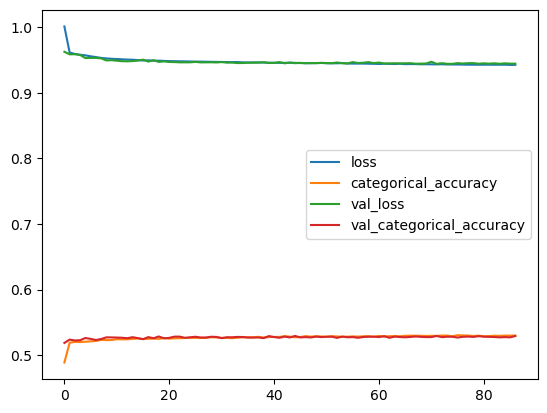

In [72]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 8. Evaluación del modelo

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

## 8.1 Predicción sobre el conjunto de Test

In [74]:
predicciones = model.predict(x_test)

1284/1284 [==============================] - 1s 724us/step


In [75]:
y_test

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [76]:
predicciones

array([[0.04974141, 0.3183229 , 0.6319357 ],
       [0.342787  , 0.4451985 , 0.21201444],
       [0.3468951 , 0.47563866, 0.17746627],
       ...,
       [0.19614421, 0.59973544, 0.2041204 ],
       [0.11785787, 0.42974302, 0.45239908],
       [0.31342638, 0.54473954, 0.14183411]], dtype=float32)

In [77]:
# Deprecated and removed after 2021-01-01
# predicciones_lab = model.predict_classes(x_test)
predicciones_lab = np.argmax(predicciones, axis=1)

In [78]:
predicciones_lab_real = predicciones_lab + 1
predicciones_lab_real

array([3, 2, 2, ..., 2, 3, 2])

In [79]:
df_test_lab = pd.DataFrame( y_test, columns=['Interest Rate 1','Interest Rate 2','Interest Rate 3'] )
df_test_lab

,Interest Rate 1,Interest Rate 2,Interest Rate 3
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
41072,0,1,0
41073,0,0,1
41074,0,0,1
41075,0,1,0


In [80]:
df_test_lab["Clase Real"] = np.where(
    df_test_lab["Interest Rate 1"]==1,
    1,
    np.where(
        df_test_lab["Interest Rate 2"]==1,
        2,
        3
    )
)
df_test_lab["Clase Real"]

0        3
1        1
2        1
3        3
4        2
        ..
41072    2
41073    3
41074    3
41075    2
41076    1
Name: Clase Real, Length: 41077, dtype: int64

In [81]:
clases = [1, 2, 3]
array_clase_real = df_test_lab["Clase Real"].to_numpy()
confusion_matrix( array_clase_real, predicciones_lab_real, labels=clases )

array([[ 1407,  5789,  1149],
       [ 1177, 12144,  4321],
       [  323,  6580,  8187]])

In [82]:
def plot_confusion_matrix(
        cm,
        clases,
        normalize=False,
        title="Confusion matrix",
        cmap=plt.cm.Blues
        ):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix normalizada")
    else:
        print("Confusion matrix sin normalizar")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks( tick_marks, clases, rotation=45 )
    plt.yticks( tick_marks, clases )

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

Confusion matrix sin normalizar
[[ 1407  5789  1149]
 [ 1177 12144  4321]
 [  323  6580  8187]]


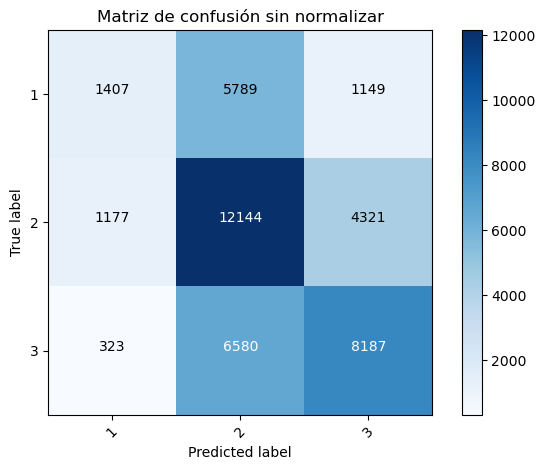

In [83]:
cnf_matrix = confusion_matrix(
    array_clase_real, predicciones_lab_real, labels=clases
)
np.set_printoptions(precision=2)

# Plot de la matriz de confusión no serializada
plt.figure()
plot_confusion_matrix(
    cnf_matrix, clases=clases,
    title="Matriz de confusión sin normalizar"
)

## 8.2 Predicción sobre nuevos datos

In [84]:
# Leer datos
df_pred = pd.read_excel("./src/info_prestamos - predecir.xlsx", sheet_name="info_prestamos - predecir")
## Nos quedamos solo con las columnas que nos interesan
df_pred = df_pred[df.columns]
# Transformat
df_pred["Length_Employed"] = df_pred["Length_Employed"].str.replace("< 1 year", "0 years")
df_pred["Length_Employed"] = df_pred["Length_Employed"].str.extract("(\d+)")
df_pred["Length_Employed"] = df_pred["Length_Employed"].apply(pd.to_numeric)
df_pred["Length_Employed"] = df_pred.apply(lambda x: completa_len_empl(x["Total_Accounts"], x["Length_Employed"]), axis=1)
# Añadir columnas dummy (necesario agregar el mismo número de columnas anterior)
dummies_pred = pd.get_dummies(df_pred[['Home_Owner', 'Purpose_Of_Loan', 'Gender']])
df_post_pred = pd.concat([df_pred,dummies_pred], axis=1)
df_post_pred = df_post_pred.drop(['Home_Owner', 'Purpose_Of_Loan', 'Gender'], axis=1)
x_pred = df_post_pred.drop("Interest_Rate", axis=1)
x_pred = scaler.transform(x_pred)
# Realizar predicción
# resultado = model.predict_classes(x_pred)+1 # Deprecated method
resultado = np.argmax(x_pred, axis=1) + 1
# Unimos la predicción con los datos originales
df_pred['PREDICCION'] = pd.DataFrame(resultado)
df_pred

/home/hisham/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate,PREDICCION
0,7.000,0,Rent,55000.0,car,18.37,0,14,Female,1,11
1,30.000,4,Mortgage,40000.0,debt_consolidation,14.93,0,24,Female,3,7
2,24.725,7,Mortgage,75566.4,debt_consolidation,15.88,0,16,Male,3,7
3,16.000,0,Mortgage,56160.0,debt_consolidation,14.34,3,22,Male,3,7
4,17.000,8,Own,96000.0,debt_consolidation,22.17,1,30,Female,1,10
5,4.500,2,Rent,30000.0,credit_card,10.88,1,15,Male,3,11
6,18.075,4,Rent,85000.0,debt_consolidation,5.65,0,12,Male,3,11
7,15.000,0,Rent,115000.0,debt_consolidation,7.97,1,31,Female,2,11
8,6.300,10,Rent,125000.0,debt_consolidation,16.12,3,9,Female,3,2
9,30.000,10,Own,163000.0,debt_consolidation,11.13,0,43,Male,1,2


In [85]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_Amount_Requested  27 non-null     float64
 1   Length_Employed        27 non-null     int64  
 2   Home_Owner             27 non-null     object 
 3   Annual_Income          27 non-null     float64
 4   Purpose_Of_Loan        27 non-null     object 
 5   Debt_To_Income         27 non-null     float64
 6   Inquiries_Last_6Mo     27 non-null     int64  
 7   Total_Accounts         27 non-null     int64  
 8   Gender                 27 non-null     object 
 9   Interest_Rate          27 non-null     int64  
 10  PREDICCION             27 non-null     int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.4+ KB


# 9.Monitorización con Tensorboard

In [86]:
def getLogDirectory():
    from sys import platform as p
    from datetime import datetime
    dis = ''
    time = datetime.now().strftime("%Y%m%d%H%M")
    if p == 'linux' or p == 'darwin':
        dir = './logs/fit/'+ time
    if p == 'win32' or p == 'cygwin':
        dir = './logs\\fit\\'+ time
    return dir

directory = getLogDirectory()
directory

'./logs/fit/202303121339'

In [87]:
from tensorflow.keras.callbacks import TensorBoard

In [88]:
board = TensorBoard(
    log_dir=directory, histogram_freq=1,
    write_graph=True, write_images=True,
    update_freq="epoch", profile_batch=2,
    embeddings_freq=1
)

2023-03-12 13:39:32.755559: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-12 13:39:32.755621: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-12 13:39:32.756274: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-03-12 13:39:32.756961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2023-03-12 13:39:32.757122: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so'; dlerror: libcupti.so: cannot open shared object file: No such file or directory
2023-03-12 13:39:32.757136: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: error 999: 
2023-03-12 13:39:32.757152: E tensorflow/core/profiler/backends/

## 9.1 Entrenamiento del modelo

In [89]:
model = Sequential()
# Elegir número de neuronas
neuronas = x_train.shape[1]
neuronas_salida = len(df["Interest_Rate"].unique())

# Agregar capas
model.add( Dense( units=neuronas, activation='relu' ) )
model.add( Dense( units=np.round(neuronas/2), activation='relu' ) )
model.add( Dense( units=neuronas_salida, activation='softmax' ) ) # softmax relaciona las categorías entre si

# Para una clasificación multiclase usamos "categorical_crossentropy"
model.compile( loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"] )

In [90]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=200,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop, board]
)

Epoch 1/200
171/482 [=========>....................] - ETA: 0s - loss: 1.0507 - categorical_accuracy: 0.4330

2023-03-12 13:39:33.544830: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-12 13:39:33.544869: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-12 13:39:33.544916: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-03-12 13:39:33.544926: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2023-03-12 13:39:33.544930: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-03-12 13:39:33.544935: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2023-03-12 13:39:33.547428: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-12 13:3

482/482 [==============================] - 1s 2ms/step - loss: 1.0038 - categorical_accuracy: 0.4813 - val_loss: 0.9627 - val_categorical_accuracy: 0.5224
Epoch 2/200
482/482 [==============================] - 1s 2ms/step - loss: 0.9613 - categorical_accuracy: 0.5184 - val_loss: 0.9564 - val_categorical_accuracy: 0.5243
Epoch 3/200
482/482 [==============================] - 1s 2ms/step - loss: 0.9587 - categorical_accuracy: 0.5197 - val_loss: 0.9562 - val_categorical_accuracy: 0.5254
Epoch 4/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9573 - categorical_accuracy: 0.5201 - val_loss: 0.9541 - val_categorical_accuracy: 0.5244
Epoch 5/200
482/482 [==============================] - 1s 2ms/step - loss: 0.9562 - categorical_accuracy: 0.5208 - val_loss: 0.9552 - val_categorical_accuracy: 0.5249
Epoch 6/200
482/482 [==============================] - 1s 1ms/step - loss: 0.9555 - categorical_accuracy: 0.5213 - val_loss: 0.9516 - val_categorical_accuracy: 0.5257
Epoch 7/20

## 9.2 Ejecutar Tensorboard

In [91]:
# Ejecutar en la línea de comandos
# tensorboard --logdir logs\fit\20230312
# Tomar en cuenta que el directorio podría variar por la carpeta o el SO